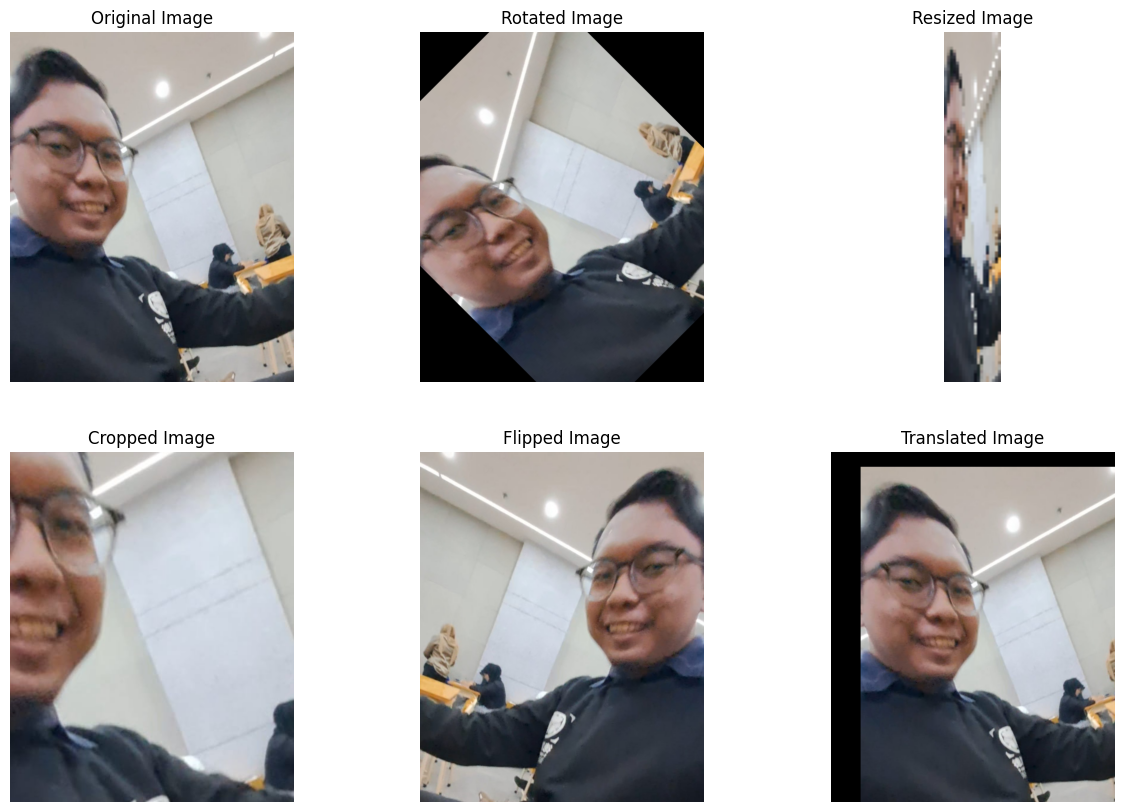

In [12]:
# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (replace 'tes.jpeg' with the path to your image)
image = cv2.imread('tes.jpeg')

# Check if the image was loaded successfully
if image is None:
    raise ValueError("Error: Unable to load image. Please check the file path.")

# Convert the image from BGR (OpenCV default) to RGB (for matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to display images
def display_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# 1. Original Image
original_image = image_rgb

# 2. Rotated Image (45 degrees)
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv2.warpAffine(image_rgb, M, (w, h))

# 3. Resized Image (quarter the size)
resized_image = cv2.resize(image_rgb, (w // 50, h // 10))

# 4. Cropped Image (center 200x200 area)
start_row, start_col = int(h * .25), int(w * .25)
end_row, end_col = int(h * .75), int(w * .75)
cropped_image = image_rgb[start_row:end_row, start_col:end_col]

# 5. Flipped Image (horizontally)
flipped_image = cv2.flip(image_rgb, 1)

# 6. Translated Image (shifted right by 100 pixels and down by 50 pixels)
M = np.float32([[1, 0, 100], [0, 1, 50]])
translated_image = cv2.warpAffine(image_rgb, M, (w, h))

# Display all images
images = [original_image, rotated_image, resized_image, cropped_image, flipped_image, translated_image]
titles = ['Original Image', 'Rotated Image', 'Resized Image', 'Cropped Image', 'Flipped Image', 'Translated Image']

display_images(images, titles)
